In [1]:
# Importing Panda and NumPy

import numpy as np
import pandas as pd

In [2]:
# Importing Dataset

df = pd.read_csv(r"/content/parkinsons.csv")

In [3]:
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
127,phon_R01_S31_6,166.888,198.966,79.512,0.00638,0.00004,0.00368,0.00351,0.01104,0.02857,...,0.04641,0.01796,18.330,1,0.585169,0.736964,-5.825257,0.115697,1.996146,0.196535
15,phon_R01_S04_4,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,...,0.02316,0.00839,25.175,1,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
112,phon_R01_S26_4,204.664,221.300,189.621,0.00841,0.00004,0.00502,0.00485,0.01506,0.02378,...,0.03831,0.01316,21.305,1,0.498877,0.722085,-4.876336,0.212054,2.376749,0.268144
16,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,...,0.02908,0.01859,22.333,1,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,...,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


In [4]:
df.shape

(195, 24)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Model building
# 4. Evaluation

In [6]:
# @title Data Cleaning Process

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
# Checking for missing values

df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
# Check for duplicate values

df.duplicated().sum()

0

In [11]:
# @title Exploratory Data Analysis

In [12]:

# Getting the statistical measures of the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
# Finding Number of False and True Parkinsons cases in status

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [14]:
df.groupby('status').mean()

<ipython-input-14-b48f8e817573>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


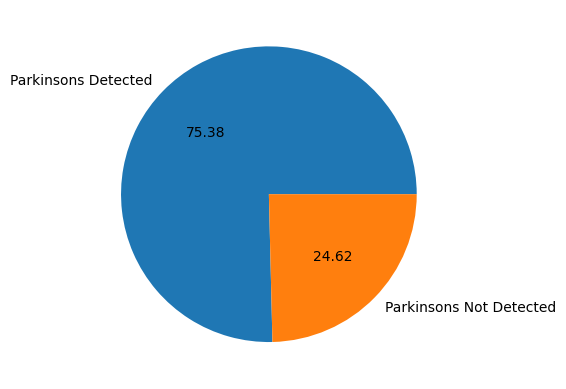

In [15]:
#Plotting Pie chart
import matplotlib.pyplot as plt
plt.pie(df['status'].value_counts(), labels=['Parkinsons Detected','Parkinsons Not Detected'],autopct="%0.2f")
plt.show()

<Axes: xlabel='HNR', ylabel='Count'>

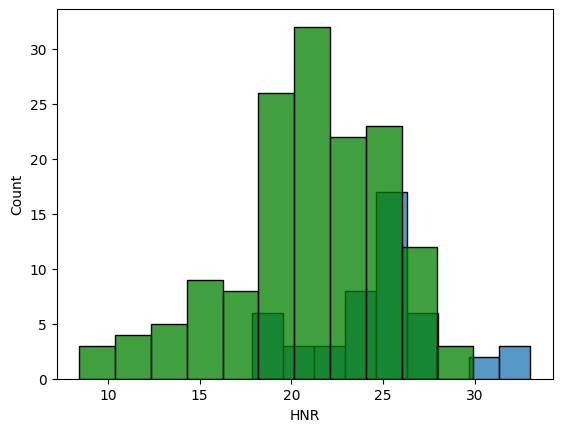

In [16]:
import seaborn as sns

# Plotting Histplot

sns.histplot(df[df['status'] == 0]['HNR'])
sns.histplot(df[df['status'] == 1]['HNR'],color='green')

In [17]:
# @title Model Building

In [18]:
# Separating the data and labels
X = df.drop(columns = ['name','status'], axis=1)
Y = df['status']



In [19]:
print(X.sample(5))

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
112      204.664       221.300       189.621         0.00841   
62       222.236       231.345       205.495         0.00266   
37       176.170       185.604       163.564         0.00369   
153      121.345       139.644        98.250         0.00684   
21       153.880       172.860        78.128         0.00480   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
112           0.00004   0.00502   0.00485     0.01506       0.02378   
62            0.00001   0.00152   0.00144     0.00457       0.01643   
37            0.00002   0.00205   0.00218     0.00616       0.01851   
153           0.00006   0.00388   0.00332     0.01164       0.02534   
21            0.00003   0.00232   0.00267     0.00696       0.04137   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
112             0.210  ...   0.01767      0.03831  0.01316  21.305  0.498877   
62              0.145  ...  

In [20]:
print(Y.sample(5))

181    1
4      1
186    0
68     1
47     0
Name: status, dtype: int64


In [21]:
#from sklearn.preprocessing import StandardScaler

In [22]:
#scaler = StandardScaler()#creation of instance
#scaler.fit(X)#fiting of X data
#standarized_data = scaler.transform(X)#transforming data
#X = standarized_data #feeding the standarized data to the X variable


In [23]:
print(X)
print(Y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,classification_report


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [27]:
def perform(Y_pred):
  print("Accuracy : ", accuracy_score(Y_test, Y_pred))
  print("Precision : ", precision_score(Y_test, Y_pred, average = 'micro'))
  print("Recall : ", recall_score(Y_test, Y_pred, average = 'micro'))
  print("F1 Score : ", f1_score(Y_test, Y_pred, average = 'micro'))

In [28]:
# Applying Classification Techniques

In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
svc = SVC(kernel='linear', gamma='scale')
gnb = GaussianNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [31]:
clfs = {
    'Support Vector Machine' : svc,
    'Naive bayes ': gnb,
    'Linear Regression': lrc,
    'K-Nearest Neighbour' : knc,
    'Random Forest': rfc
}

In [32]:
def score_find(Y_test,Y_pred):
    Accuracy = accuracy_score(Y_test,Y_pred)
    Precision = precision_score(Y_test,Y_pred)
    Recall = recall_score(Y_test, Y_pred, average = 'micro')
    F1_score = f1_score(Y_test, Y_pred, average = 'micro')


    return Accuracy,Precision,Recall,F1_score

In [33]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [34]:
print("For Support Vector Machine")
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(Y_test, Y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(Y_test,Y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Support Vector Machine
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39

******************************************************

Accuracy -  0.8461538461538461
Precision -  0.8709677419354839
Recall -  0.8461538461538461
F1_score -  0.8461538461538461



In [35]:
print("For Bernoulli Naive Bayes")
gnb.fit(X_train,Y_train)
Y_pred = gnb.predict(X_test)

print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(Y_test, Y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(Y_test,Y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Bernoulli Naive Bayes
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.94      0.59      0.72        29

    accuracy                           0.67        39
   macro avg       0.69      0.74      0.65        39
weighted avg       0.81      0.67      0.69        39

******************************************************

Accuracy -  0.6666666666666666
Precision -  0.9444444444444444
Recall -  0.6666666666666666
F1_score -  0.6666666666666666



In [36]:
print("For Logistic Regression")
lrc.fit(X_train,Y_train)
Y_pred = lrc.predict(X_test)

print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(Y_test, Y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(Y_test,Y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Logistic Regression
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.81      0.90      0.85        29

    accuracy                           0.77        39
   macro avg       0.69      0.65      0.66        39
weighted avg       0.75      0.77      0.75        39

******************************************************

Accuracy -  0.7692307692307693
Precision -  0.8125
Recall -  0.7692307692307693
F1_score -  0.7692307692307693



In [37]:
print("For K-Nearest Neighbour")
knc.fit(X_train,Y_train)
Y_pred = knc.predict(X_test)

print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(Y_test, Y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(Y_test,Y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For K-Nearest Neighbour
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39

******************************************************

Accuracy -  0.8974358974358975
Precision -  0.8787878787878788
Recall -  0.8974358974358975
F1_score -  0.8974358974358975



In [38]:
print("For Random Forest")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(Y_test, Y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(Y_test,Y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Random Forest
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

******************************************************

Accuracy -  0.9743589743589743
Precision -  0.9666666666666667
Recall -  0.9743589743589743
F1_score -  0.9743589743589743



In [39]:
# @title Model evaluation to find best model

In [40]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,
                               'Recall':recall_scores,'F1_Score':f1_scores}).sort_values('Precision',ascending=True)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_Score
2,Linear Regression,0.769231,0.812500,0.769231,0.769231
0,Support Vector Machine,0.846154,0.870968,0.846154,0.846154
3,K-Nearest Neighbour,0.897436,0.878788,0.897436,0.897436
1,Naive bayes,0.666667,0.944444,0.666667,0.666667
4,Random Forest,0.974359,0.966667,0.974359,0.974359


In [41]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,Linear Regression,Accuracy,0.769231
1,Support Vector Machine,Accuracy,0.846154
2,K-Nearest Neighbour,Accuracy,0.897436
3,Naive bayes,Accuracy,0.666667
4,Random Forest,Accuracy,0.974359
5,Linear Regression,Precision,0.812500
6,Support Vector Machine,Precision,0.870968
7,K-Nearest Neighbour,Precision,0.878788
8,Naive bayes,Precision,0.944444
9,Random Forest,Precision,0.966667


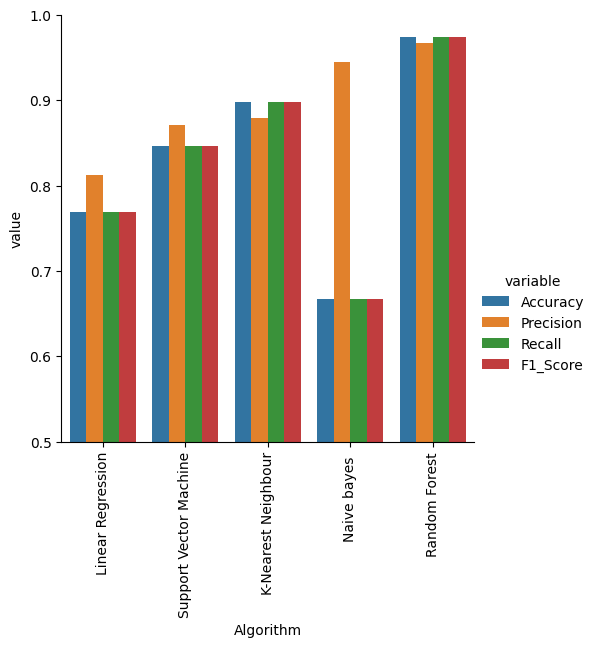

In [42]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#@title Best model found to be: Random Forest

In [44]:
# Predictive System
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
# Saving the best trained model

In [46]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [47]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [48]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
